In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("Flop_Hit_Movie_Classification_Labeled.csv")

# Step 2: Drop rows with missing values
df_cleaned = df.dropna()

# Step 3: Convert categorical target variable to numeric values
status_mapping = {'Hit': 1,'Flop': 0}
df_cleaned['movie_status'] = df_cleaned['movie_status'].map(status_mapping)

# Step 4: Separate features and labels
X = df_cleaned.drop(columns=['movie_status'])
y = df_cleaned['movie_status']

# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [21]:
# Step 6: Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 8: Predict on test data
y_pred = gnb.predict(X_test)

# Step 9: Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.6899724011039559

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.93      0.76       572
           1       0.84      0.43      0.57       515

    accuracy                           0.69      1087
   macro avg       0.74      0.68      0.66      1087
weighted avg       0.74      0.69      0.67      1087


🔍 Confusion Matrix:
 [[530  42]
 [295 220]]


/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_30555/778330428.py:18: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


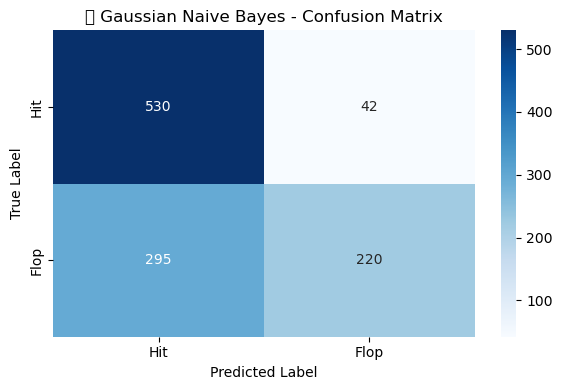

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
cm = np.array([[530, 42],
               [295, 220]])

# Labels for the axes
labels = ['Hit', 'Flop']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("🎬 Gaussian Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
